In [1]:
import torch
import numpy as np
import lightning as pl
import os
from typing import Optional
import torch.utils.data
import torchvision

/usr/local/tp_deep_learning/lib/python3.8/site-packages/numpy/lib/scimath.py:46: RuntimeWarning: divide by zero encountered in log
  _ln2 = nx.log(2.0)


In [2]:
!pip list | grep torch

efficientnet-pytorch         0.7.1
pytorch-lightning            2.0.1
segmentation-models-pytorch  0.3.0
torch                        2.0.0
torchmetrics                 0.11.4
torchvision                  0.15.1

[notice] A new release of pip available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [45]:
class GTSRBDataModule(pl.LightningDataModule):
    def __init__(self, 
        data_dir:str='./data',
        batch_size:int=32,
        size_val:float=0.1,
        manual_seed_train_val:int=42):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.size_val = size_val
        self.manual_seed_train_val = manual_seed_train_val
    def prepare_data(self):
          pass # à compléter
        
    def setup(self, stage: Optional[str] = None):
          pass # à compléter
        
    def train_dataloader(self):
          pass # à compléter
    
    def val_dataloader(self):
          pass # à compléter
    
    def test_dataloader(self):
          pass # à compléter
    
    def predict_dataloader(self):
          pass # à compléter


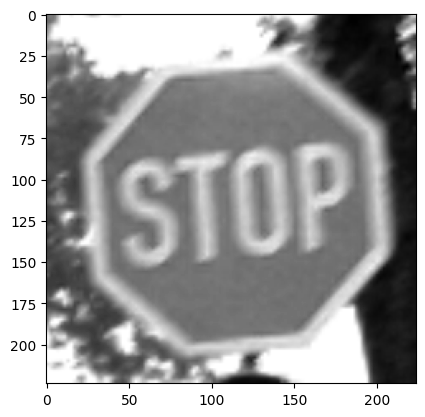

In [46]:
import matplotlib.pyplot as plt
gtsrb = GTSRBDataModule()
gtsrb.prepare_data()
gtsrb.setup()
d = next(iter(gtsrb.train_dataloader()))
plt.imshow(d[0][0,0],cmap='gray')
plt.show()

In [47]:
print(d[0].shape)

torch.Size([32, 3, 224, 224])


In [57]:
from torchvision.models import resnet18, ResNet18_Weights
import torch.nn.functional as F
from torch import nn
from torchmetrics import Accuracy

class MyLightningModuleNet(pl.LightningModule):
    def __init__(self,
                 lr:float=0.1,
                 momentum:float=0.9,
                 weight_decay:float=1e-4,
                 num_class:int=4,#43,
                 *args, 
                 **kwargs
                ):
        super().__init__()
        pass # à compléter

    def forward(self, x):
          pass # à compléter

    def training_step(self, batch:torch.Tensor, batch_idx: int):
          pass # à compléter
    
    def validation_step(self, batch, batch_idx):
          pass # à compléter
        
    
    def test_step(self, batch, batch_idx):
          pass # à compléter
        
    def configure_optimizers(self):
          pass # à compléter


In [64]:
trainer = pl.Trainer(max_epochs=4)
model = MyLightningModuleNet()
trainer.fit(model, train_dataloaders=gtsrb.train_dataloader(),val_dataloaders=gtsrb.val_dataloader())


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name       | Type               | Params
--------------------------------------------------
0 | resnet18   | ResNet             | 11.2 M
1 | loss_train | CrossEntropyLoss   | 0     
2 | loss_val   | CrossEntropyLoss   | 0     
3 | loss_test  | CrossEntropyLoss   | 0     
4 | acc_val    | MulticlassAccuracy | 0     
5 | acc_test   | MulticlassAccuracy | 0     
--------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.714    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/jurie/python/pytorch/lib/python3.8/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:478: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/Users/jurie/python/pytorch/lib/python3.8/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/jurie/python/pytorch/lib/python3.8/site-packages/torchmetrics/functional/classification/accuracy.py:65: UserWarning: MPS: no support for int64 reduction ops, casting it to int32 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/ReduceOps.mm:144.

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


In [66]:
trainer.validate(model, dataloaders=gtsrb.test_dataloader())


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8095238208770752     │
│         val_loss          │    0.8958467841148376     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.8958467841148376, 'val_acc': 0.8095238208770752}]